<a href="https://colab.research.google.com/github/DanielCRC/Daniel-AI-lab/blob/main/Assignment_7_Daniel_Chaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [2]:

import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


In [3]:
df = df.iloc[:1000]

In [4]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

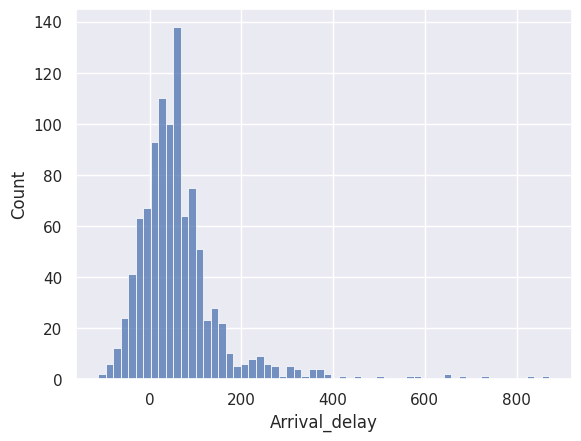

In [5]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of the plots using Seaborn.
sns.set()

# Create a histogram plot of the 'Arrival_delay' column from the DataFrame 'df'.
sns.histplot(x=df['Arrival_delay'])

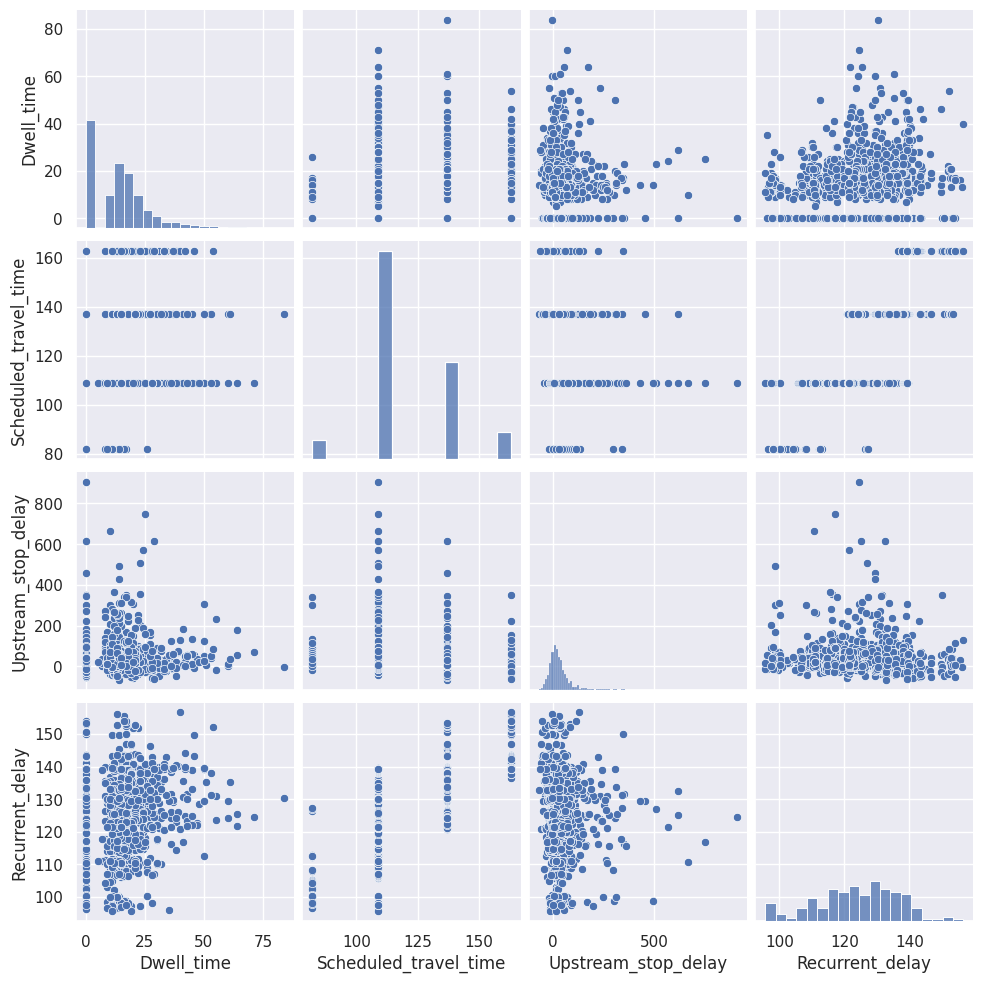

In [6]:

# Calculate the correlation matrix for all columns in the DataFrame 'df'.
corr_matrix = df.corr()
# Sort the correlations between the 'Arrival_delay' column and other columns in descending order.
# This shows the correlation coefficients for each column with respect to 'Arrival_delay'.
correlations_with_arrival_delay = corr_matrix['Arrival_delay'].sort_values(ascending=False)

# Create a DataFrame 'x' containing all columns except 'Arrival_delay'.
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']
# Use Seaborn's pairplot to visualize pairwise relationships between the features in 'x'.
sns.pairplot(x)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
20/20 [==============================] - 1s 7ms/step - loss: 56.9598 - mae: 56.9598 - val_loss: 43.2076 - val_mae: 43.2076
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 43.9872 - mae: 43.9872 - val_loss: 35.9883 - val_mae: 35.9883
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 35.8305 - mae: 35.8305 - val_loss: 33.8674 - val_mae: 33.8674
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 31.9990 - mae: 31.9990 - val_loss: 35.3084 - val_mae: 35.3084
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 31.3424 - mae: 31.3424 - val_loss: 34.0254 - val_mae: 34.0254
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 31.0717 - mae: 31.0717 - val_loss: 33.0374 - val_mae: 33.0374
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 31.1544 - mae: 31.1544 - val_loss: 32.8258 - val_mae: 32.8258
Epoch 8/200
20/20 [==============================] - 0s

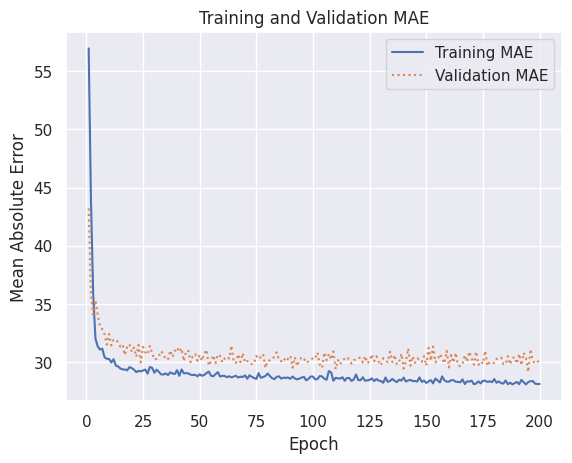

In [8]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the true and predicted values.
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2 = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 27.696110244765876
Mean Squared Error: 1380.0302717096854
R-squared: 0.8830283611936415


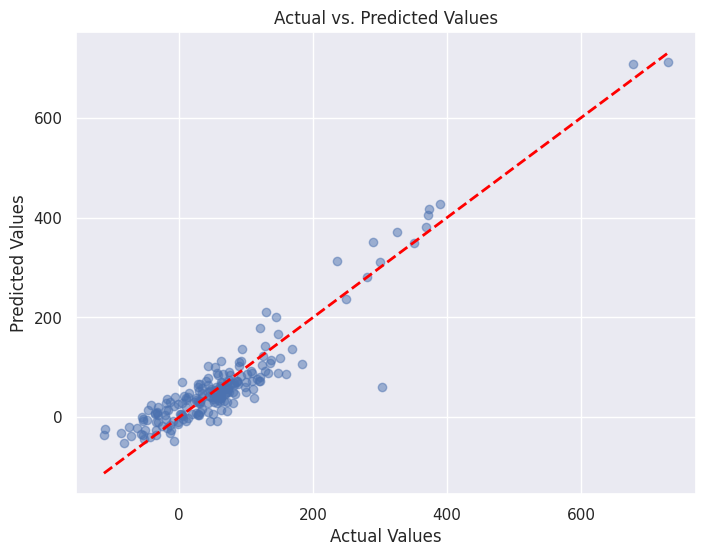

In [10]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

# **Task 2**


Epoch 1: val_mae improved from inf to 48.63841, saving model to weights.best.h5

Epoch 2: val_mae improved from 48.63841 to 39.41405, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 39.41405 to 32.79868, saving model to weights.best.h5

Epoch 4: val_mae improved from 32.79868 to 32.68806, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 32.68806

Epoch 6: val_mae improved from 32.68806 to 32.30157, saving model to weights.best.h5

Epoch 7: val_mae improved from 32.30157 to 31.86938, saving model to weights.best.h5

Epoch 8: val_mae did not improve from 31.86938

Epoch 9: val_mae improved from 31.86938 to 31.59470, saving model to weights.best.h5

Epoch 10: val_mae improved from 31.59470 to 31.58715, saving model to weights.best.h5

Epoch 11: val_mae improved from 31.58715 to 31.49853, saving model to weights.best.h5

Epoch 12: val_mae improved from 31.49853 to 31.15392, saving model to weights.best.h5

Epoch 13: val_mae improved from 31.15392 to 31.06099, saving model to weights.best.h5

Epoch 14: val_mae did not improve from 31.06099

Epoch 15: val_mae improved from 31.06099 to 30.78713, saving model to weight

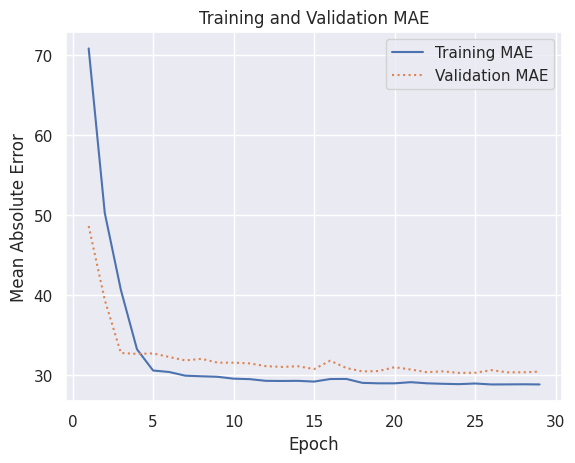

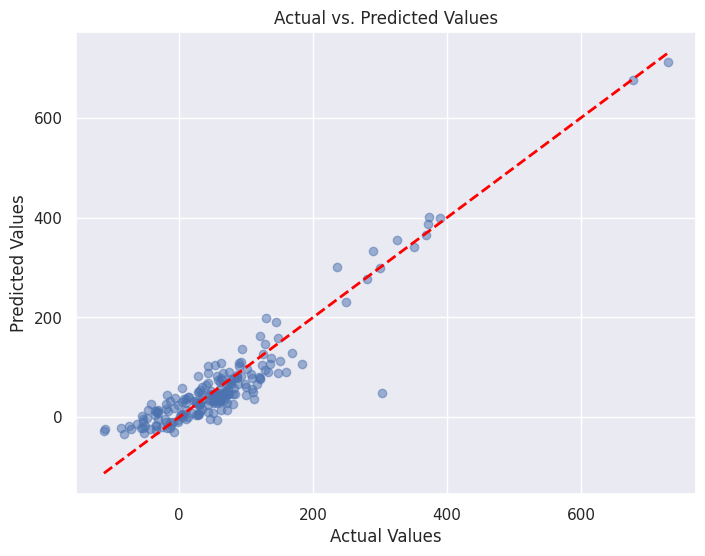

In [11]:
from json import load
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************

def construct_network_model():
  # Create a Sequential model, which is a linear stack of layers.
  model = Sequential()

  # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
  model.add(Dense(32, activation='relu', input_dim=4))

  # # Add a Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add another Dense layer with 64 units and ReLU activation.
  model.add(Dense(64, activation='relu'))

  # # Add another Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  model.add(Dense(1))
  return model

model=construct_network_model()
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can choose to add the dropout layer or not*****************


#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can choose to use the callback function or not**************
# Do not use the callback function
# hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function or not*************

#-------------------------------------------------model evaluation--------------------------------------------------------------------

# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()

# **Task 3**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Mean Squared Error of linear model: {mse_linear}")
print(f"R-squared of linear model: {r2_linear}")


Epoch 1: val_mae improved from inf to 48.92765, saving model to weights.best.h5

Epoch 2: val_mae improved from 48.92765 to 42.03080, saving model to weights.best.h5

Epoch 3: val_mae improved from 42.03080 to 36.82659, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_mae improved from 36.82659 to 32.08178, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 32.08178

Epoch 6: val_mae did not improve from 32.08178

Epoch 7: val_mae did not improve from 32.08178

Epoch 8: val_mae did not improve from 32.08178

Epoch 9: val_mae improved from 32.08178 to 32.01296, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 32.01296

Epoch 11: val_mae did not improve from 32.01296

Epoch 12: val_mae did not improve from 32.01296

Epoch 13: val_mae did not improve from 32.01296

Epoch 14: val_mae did not improve from 32.01296
7/7 [==============================] - 0s 1ms/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 29.04921398229897
Mean Squared Error: 1491.67474996874
R-squared: 0.87356535313262
--------------------------------------this is result of the linear regression model---------------------------

# **Assignment**


Epoch 1: val_mae improved from inf to 50.76995, saving model to weights.best.h5

Epoch 2: val_mae improved from 50.76995 to 38.97145, saving model to weights.best.h5

Epoch 3: val_mae improved from 38.97145 to 32.28102, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 32.28102


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_mae did not improve from 32.28102

Epoch 6: val_mae improved from 32.28102 to 32.25732, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 32.25732

Epoch 8: val_mae did not improve from 32.25732

Epoch 9: val_mae improved from 32.25732 to 31.85782, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 31.85782

Epoch 11: val_mae did not improve from 31.85782

Epoch 12: val_mae did not improve from 31.85782

Epoch 13: val_mae did not improve from 31.85782

Epoch 14: val_mae did not improve from 31.85782
7/7 [==============================] - 0s 1ms/step
Mean Absolute Error: 29.74619277894497
Mean Squared Error: 1536.0671002381687
R-squared: 0.869802648742775


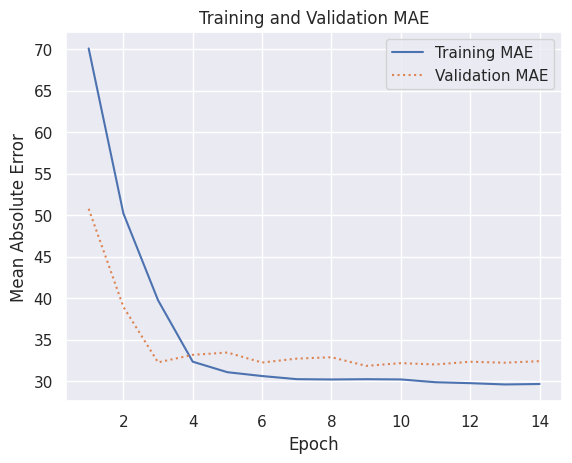

In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************




#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1: val_mae improved from inf to 34.25578, saving model to weights.best.h5

Epoch 2: val_mae improved from 34.25578 to 31.64844, saving model to weights.best.h5

Epoch 3: val_mae improved from 31.64844 to 31.05774, saving model to weights.best.h5

Epoch 4: val_mae improved from 31.05774 to 30.56625, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_mae did not improve from 30.56625

Epoch 6: val_mae did not improve from 30.56625

Epoch 7: val_mae did not improve from 30.56625

Epoch 8: val_mae did not improve from 30.56625

Epoch 9: val_mae did not improve from 30.56625
7/7 [==============================] - 0s 1ms/step
Mean Absolute Error: 28.04706967242062
Mean Squared Error: 1417.8321783050376
R-squared: 0.8798242641132309


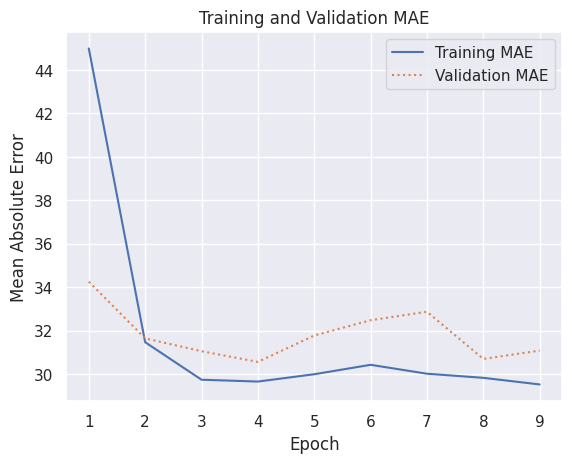

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 64 units, ReLU activation, and an input dimension of 4.
model.add(Dense(64, activation='linear', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='linear'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************




#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1: val_mae improved from inf to 68.11604, saving model to weights.best.h5

Epoch 2: val_mae improved from 68.11604 to 67.44728, saving model to weights.best.h5

Epoch 3: val_mae improved from 67.44728 to 66.85872, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_mae improved from 66.85872 to 66.35101, saving model to weights.best.h5

Epoch 5: val_mae improved from 66.35101 to 65.90635, saving model to weights.best.h5

Epoch 6: val_mae improved from 65.90635 to 65.51842, saving model to weights.best.h5

Epoch 7: val_mae improved from 65.51842 to 65.16524, saving model to weights.best.h5

Epoch 8: val_mae improved from 65.16524 to 64.83878, saving model to weights.best.h5

Epoch 9: val_mae improved from 64.83878 to 64.51549, saving model to weights.best.h5

Epoch 10: val_mae improved from 64.51549 to 64.20583, saving model to weights.best.h5

Epoch 11: val_mae improved from 64.20583 to 63.93343, saving model to weights.best.h5

Epoch 12: val_mae improved from 63.93343 to 63.66894, saving model to weights.best.h5

Epoch 13: val_mae improved from 63.66894 to 63.40368, saving model to weights.best.h5

Epoch 14: val_mae improved from 63.40368 to 63.13201, saving model to weights.best.h5

Epoch 15: val_mae improved from 63.13201 to 62.8

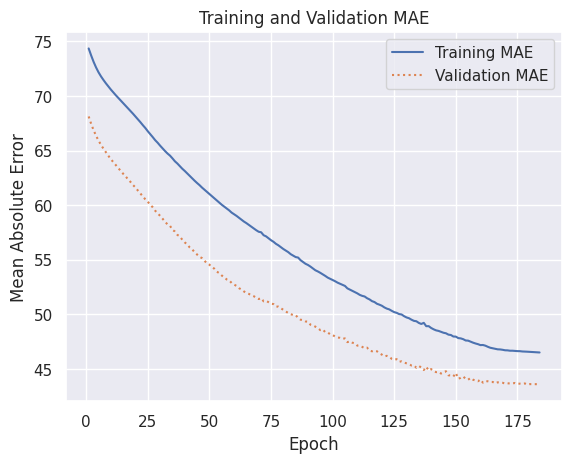

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 64 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='sigmoid', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(32, activation='sigmoid'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************




#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1: val_mae improved from inf to 69.03184, saving model to weights.best.h5

Epoch 2: val_mae improved from 69.03184 to 69.00098, saving model to weights.best.h5

Epoch 3: val_mae improved from 69.00098 to 68.97135, saving model to weights.best.h5

Epoch 4: val_mae improved from 68.97135 to 68.94109, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_mae improved from 68.94109 to 68.91112, saving model to weights.best.h5

Epoch 6: val_mae improved from 68.91112 to 68.87996, saving model to weights.best.h5

Epoch 7: val_mae improved from 68.87996 to 68.85034, saving model to weights.best.h5

Epoch 8: val_mae improved from 68.85034 to 68.82060, saving model to weights.best.h5

Epoch 9: val_mae improved from 68.82060 to 68.78938, saving model to weights.best.h5

Epoch 10: val_mae improved from 68.78938 to 68.75934, saving model to weights.best.h5

Epoch 11: val_mae improved from 68.75934 to 68.72971, saving model to weights.best.h5

Epoch 12: val_mae improved from 68.72971 to 68.69753, saving model to weights.best.h5

Epoch 13: val_mae improved from 68.69753 to 68.66796, saving model to weights.best.h5

Epoch 14: val_mae improved from 68.66796 to 68.63759, saving model to weights.best.h5

Epoch 15: val_mae improved from 68.63759 to 68.60781, saving model to weights.best.h5

Epoch 16: val_mae improved from 68.60781 to 68.

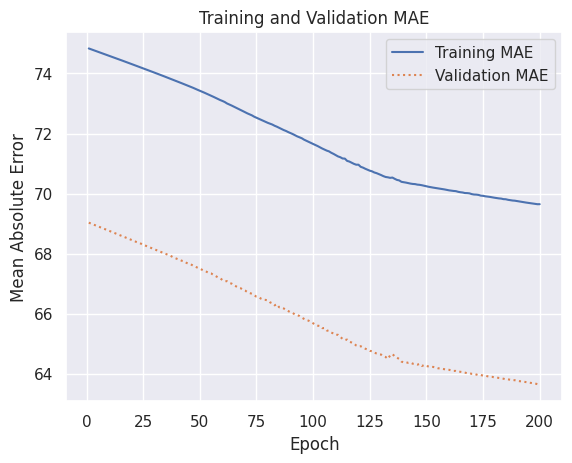

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 64 units, ReLU activation, and an input dimension of 4.
model.add(Dense(64, activation='softmax', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='softmax'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************




#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1: val_mae improved from inf to 39.70434, saving model to weights.best.h5

Epoch 2: val_mae improved from 39.70434 to 33.00990, saving model to weights.best.h5

Epoch 3: val_mae did not improve from 33.00990

Epoch 4: val_mae improved from 33.00990 to 32.84601, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_mae did not improve from 32.84601

Epoch 6: val_mae improved from 32.84601 to 32.66784, saving model to weights.best.h5

Epoch 7: val_mae improved from 32.66784 to 32.61945, saving model to weights.best.h5

Epoch 8: val_mae improved from 32.61945 to 32.44826, saving model to weights.best.h5

Epoch 9: val_mae improved from 32.44826 to 31.66526, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 31.66526

Epoch 11: val_mae improved from 31.66526 to 31.38444, saving model to weights.best.h5

Epoch 12: val_mae did not improve from 31.38444

Epoch 13: val_mae improved from 31.38444 to 31.28177, saving model to weights.best.h5

Epoch 14: val_mae did not improve from 31.28177

Epoch 15: val_mae improved from 31.28177 to 30.83329, saving model to weights.best.h5

Epoch 16: val_mae did not improve from 30.83329

Epoch 17: val_mae did not improve from 30.83329

Epoch 18: val_mae did not improve from 30.83329

Epoch 19: val_mae improved from 30.83329 to 30.81539

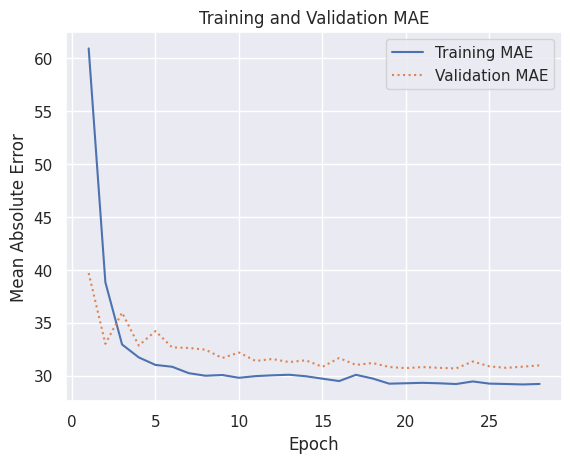

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 64 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='linear', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1: val_mae improved from inf to 32.69933, saving model to weights.best.h5

Epoch 2: val_mae did not improve from 32.69933

Epoch 3: val_mae did not improve from 32.69933

Epoch 4: val_mae did not improve from 32.69933


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_mae did not improve from 32.69933

Epoch 6: val_mae did not improve from 32.69933
7/7 [==============================] - 0s 1ms/step
Mean Absolute Error: 35.67890934476629
Mean Squared Error: 2515.8132884068104
R-squared: 0.7867591680353622


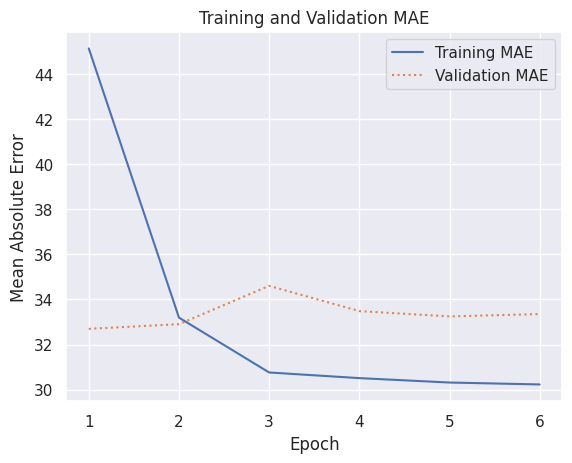

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 64 units, ReLU activation, and an input dimension of 4.
model.add(Dense(16, activation='linear', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(32, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************




#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1: val_mae improved from inf to 37.02852, saving model to weights.best.h5

Epoch 2: val_mae did not improve from 37.02852

Epoch 3: val_mae improved from 37.02852 to 33.24825, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 33.24825


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_mae improved from 33.24825 to 32.56555, saving model to weights.best.h5

Epoch 6: val_mae improved from 32.56555 to 32.52850, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 32.52850

Epoch 8: val_mae improved from 32.52850 to 31.21103, saving model to weights.best.h5

Epoch 9: val_mae did not improve from 31.21103

Epoch 10: val_mae did not improve from 31.21103

Epoch 11: val_mae did not improve from 31.21103

Epoch 12: val_mae did not improve from 31.21103

Epoch 13: val_mae improved from 31.21103 to 31.12121, saving model to weights.best.h5

Epoch 14: val_mae improved from 31.12121 to 30.93454, saving model to weights.best.h5

Epoch 15: val_mae improved from 30.93454 to 30.71461, saving model to weights.best.h5

Epoch 16: val_mae improved from 30.71461 to 30.30267, saving model to weights.best.h5

Epoch 17: val_mae did not improve from 30.30267

Epoch 18: val_mae did not improve from 30.30267

Epoch 19: val_mae did not improve from 30.30267

Epo

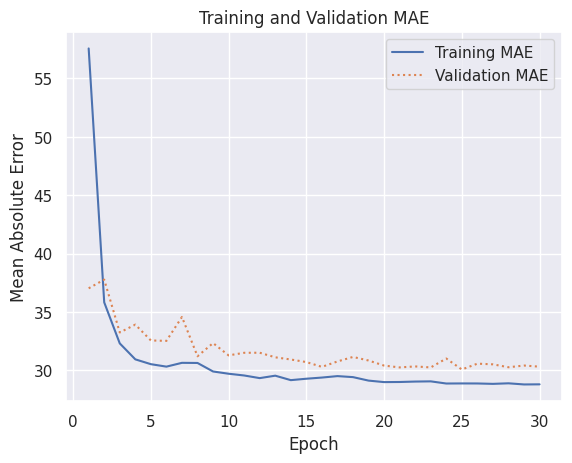

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 64 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='linear', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************




#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1: val_mae improved from inf to 36.38400, saving model to weights.best.h5

Epoch 2: val_mae improved from 36.38400 to 35.13698, saving model to weights.best.h5

Epoch 3: val_mae improved from 35.13698 to 31.90224, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_mae did not improve from 31.90224

Epoch 5: val_mae improved from 31.90224 to 31.75074, saving model to weights.best.h5

Epoch 6: val_mae improved from 31.75074 to 31.36882, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 31.36882

Epoch 8: val_mae improved from 31.36882 to 31.10962, saving model to weights.best.h5

Epoch 9: val_mae improved from 31.10962 to 29.90155, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 29.90155

Epoch 11: val_mae did not improve from 29.90155

Epoch 12: val_mae did not improve from 29.90155

Epoch 13: val_mae did not improve from 29.90155

Epoch 14: val_mae did not improve from 29.90155
7/7 [==============================] - 0s 2ms/step
Mean Absolute Error: 28.02676718460396
Mean Squared Error: 1412.2680303286284
R-squared: 0.8802958823963251


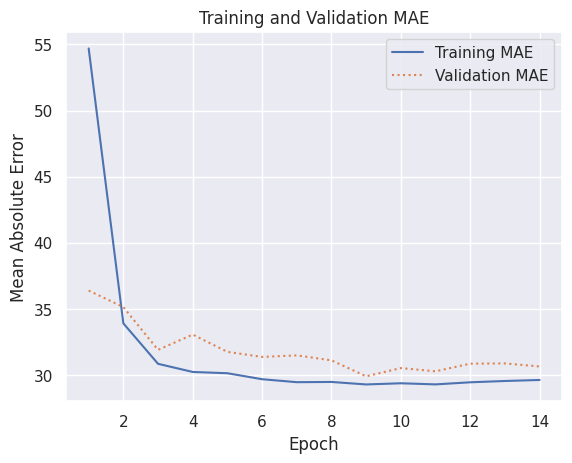

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(64, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(128, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************




#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1: val_mae improved from inf to 36.55787, saving model to weights.best.h5

Epoch 2: val_mae improved from 36.55787 to 36.17687, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 36.17687 to 34.83789, saving model to weights.best.h5

Epoch 4: val_mae improved from 34.83789 to 32.68947, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 32.68947

Epoch 6: val_mae did not improve from 32.68947

Epoch 7: val_mae did not improve from 32.68947

Epoch 8: val_mae did not improve from 32.68947

Epoch 9: val_mae did not improve from 32.68947
7/7 [==============================] - 0s 2ms/step
Mean Absolute Error: 31.758074408471586
Mean Squared Error: 1761.4126077637252
R-squared: 0.8507023189505456


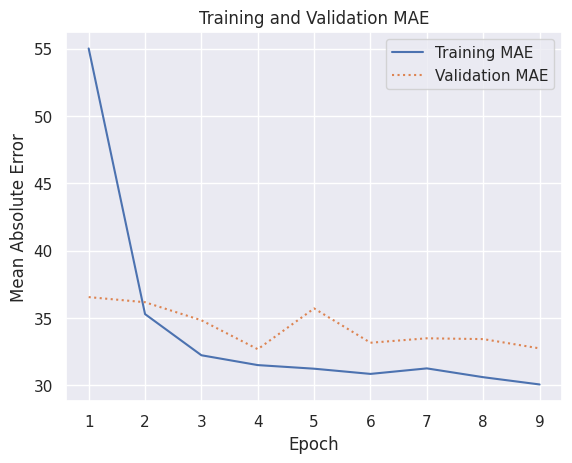

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 64 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='linear', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(128, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************




#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")